## Momentum Strategy - The trend is your friend

Investopedia defines mometum strategy as 

_"The strategy in which the traders focus on stocks that are moving significantly in one direction on high volume. Momentum traders may hold their positions for a few minutes, a couple of hours or even the entire length of the trading day, depending on how quickly the stock moves and when it changes direction"_

In this notebook we will test the use of some statistics concepts to figure out the stocks from the NIFTY-50 that have maintained and sustained a parabolic rise, often termed as 'high-flyers'. Then, we would backtest the strategy using historical data for a year and evaluate the strategy in terms of return and number of successfull trades.



### Get the Data

So we begin by fetching the data from Quandl and get our hands dirty. To use the package, we have to install the package and set up an account which gets us and API key which we will use in our code to download the data for the last two years.

In [ ]:
python get_data.py

So, the above function iterates all the 50 stocks listed in the 'nifty_50.txt' and saves in the 'data' folder.

Now let’s start step-by-step and explore the data by checking one of the stocks csv data.

In [2]:
## Exploring one of the dataset
import pandas as pd
df = pd.read_csv('data/ABB.csv')
df.head()


,Date,Open,High,Low,Close,Volume,Symbol
0,2016-01-01,1118.75,1125.00,1111.00,1116.45,16523.0,ABB
1,2016-01-04,1116.00,1125.85,1110.00,1120.15,57148.0,ABB
2,2016-01-05,1118.75,1135.35,1082.25,1094.55,69794.0,ABB
3,2016-01-06,1090.30,1104.90,1072.55,1077.60,32663.0,ABB
4,2016-01-07,1075.00,1079.90,1045.85,1053.45,32611.0,ABB


### Strategy rules 

Now that we have got the data ready, lets go head and carry out backtesting of our strategy. If you are wondering what this term means, backtesting is a simulation designed to test the performance of a set of trading and risk management rules on historic data.

First, lets lay down the rules for the strategy. For this strategy to work, stocks have to monitored and based on certain conditions, the qualifying stocks are to be shortlisted. We will test all the stocks for these conditions.

1. Capture the stock before the end of the day provided the stock has been giving positive returns for the last 3 successive days.
2. The returns for the three successive days also have to in an increasing order in terms of magnitude.
3. If the gap down(today's open minus the yesterday's low) is less than the standard deviation for the last 90 days.
4. The opening price of stock is above the last 20 days moving average.

Now that we have a specific set of stocks shortlisted, we will go ahead and place a 'buy' call just before the day close and  an exit call, just before the next day's open.


### Running a Backtest

In [ ]:
# Running the backtest for momentum with the bid value -- a sample bid value of 10000 is passed here
python backtest.py -a 100000

_Moment-of-truth!_

Let's assume that we outline a budget of 10000 INR to be invested. Will will follow a simple case of taking out the profits/loss for every trade and using the same budget of 10000 INR to trade every time we get oppurtunity.

What if there are multiple trade oppurtunities in a single day?
Well, we will split the amount accordingly without impacting the budget.

Now, running the 'backtest' script , outputs the results in two different csv's ( daily and monthly results). Lets head on to check whether the strategy was able to give out any good trades; and how much profit did we make?


In [3]:
# importing libraries
import pandas as pd


# Checking the data 
m_df = pd.read_csv('momentum_monthly.csv')
m_df['Date'] = pd.to_datetime(m_df['Date'])
m_df = m_df.set_index(m_df.Date)
m_df = m_df.drop(['Date'],axis=1)
m_df.head()


,p_l,g_l,right_bids,wrong_bids
Date,,,,
2017-01-31,7437.322682,0.204573,40.0,8.0
2017-02-28,6603.486418,0.196766,40.0,8.0
2017-03-31,6555.119994,0.191226,46.0,10.0
2017-04-30,3095.960421,0.117895,32.0,11.0
2017-05-31,3108.105608,0.107459,23.0,11.0


#### Monthly gains 

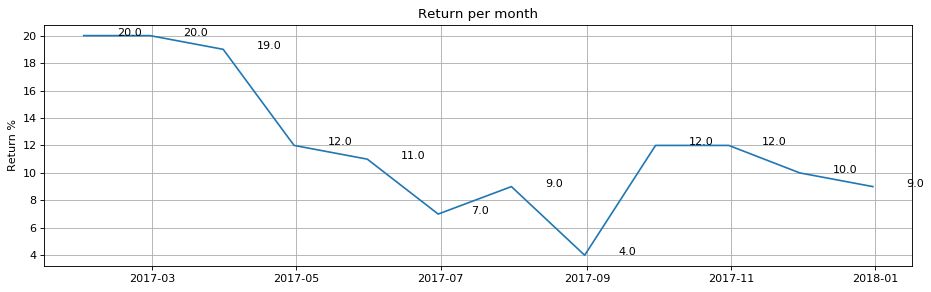

In [68]:
# Plotting the gains per month
# Matplotlib for additional customization
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
fig=plt.figure(figsize=(14, 4), dpi= 80, facecolor='w', edgecolor='k')

ax = fig.add_subplot(111)
x = m_df.index
y = (m_df['g_l']* 100).round()
plt.plot(x,y)
for i,j in zip(x,y):
    ax.annotate('%s' %j, xy=(i,j), xytext=(30,0), textcoords='offset points')

plt.ylabel('Return %')
plt.title('Return per month')
plt.grid()
plt.show()

Seems that our strategy really stood the test of the time. Monthly returns averaging around 12%. That's exciting.


#### Tha good and the bad trades

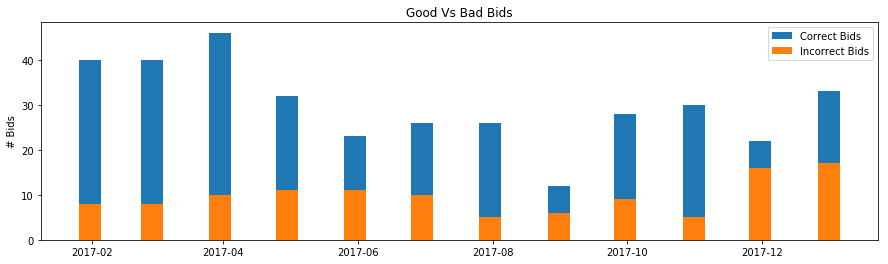

In [77]:
width = 15
height = 4
plt.figure(figsize=(width, height))
x= m_df.index
y1= m_df['right_bids']
p1 = plt.bar(x,y1,width =10)
y2 = m_df['wrong_bids']
p2 = plt.bar(x,y2,width=10)
plt.ylabel('# Bids')
plt.title('Good Vs Bad Bids')

plt.legend((p1[0], p2[0]), ('Correct Bids', 'Incorrect Bids'))

plt.show()


The above graph shows the ratio of the number of correct versus the incorrect bids that our strategy could predict. Seems like we give a fairly good job here as well. 358 correct trades vs 116 incorrect bids. That ultimately fetched us a good return indeed.

